# Data Engineering Capstone - Exploratory Data Analysis

## Table of Contents
---
<a id = "btt"></a>

#### Datasets:
1. [NOAA Historic Severe Storms](#noaa)
   * [Data Pre-Processing](#noaa_pp)
   * [Exploratory Data Analysis](#noaa_eda)
</br>
</br>
2. [Homeowners and Renters Insurance by State](#hris)
   * [Data Pre-Processing](#hris_pp)
   * [Exploratory Data Analysis](#hris_eda)
</br>
</br>
3. [State to State Migration Flows](#s2smf)
   * [Data Pre-Processing](#s2smf_pp)
   * [Exploratory Data Analysis](#s2smf_eda)

In [529]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from credentials import *

## Dataset Name: NOAA Historic Severe Storms
---
<a id = "noaa"></a>

"The Storm Events dataset is a database of severe weather events across the United States from 1950 to this year, with information about a storm's location, azimuth, distance, impact, and severity, including the cost of damages to property and crops. It contains data documenting:

The occurrence of storms and other significant weather phenomena having sufficient intensity to cause loss of life, injuries, significant property damage, and/or disruption to commerce, rare, unusual, weather phenomena that generate media attention, such as snow flurries in South Florida or the San Diego coastal area.
Other significant meteorological events, such as record maximum or minimum temperatures or precipitation that occur in connection with another event.

Data about a specific event is added to the dataset within 120 days to allow time for damage assessments and other analysis." - _National Oceanic and Atmospheric Administration (NOAA)_

#### Data Dictionary

| Variable Name | Definition |
| :- | :- |
`episode_id`| Denotes the storm episode
`event_id`| Denotes a single, small part that goes into a specific storm episode
`state`| State name where the event occurred
`state_fips_code`| Unique FIPS code identifier assiend to each state
`event_type` | Meteorological event
`cz_type` | Indicates whether the event happened in - C: County / Parish, Z: NWS Zone, M: Marine
`cz_fips_code` | Unique FIPS code identifier assigned to each county
`cz_name` | County / Parish, NWS Zone or Marine name assigned to teh county FIPS number
`wfo` | National Weather Service Forecast Office’s area of responsibility in which the event occurred
`event_begin_time` | The date and time that the event began. Note that episodes and events may have different start and end times if multiple events occured in the same episode
`event_timezone` | The time zone in which the event_begin_time and the event_end_time is recorded
`event_end_time` | The date and time that the event ended. Note that episodes and events may have different start and end times if multiple events occured in the same episode
`injuries_direct` | The number of injuries directly related to the weather event
`injuries_indirect` | The number of injuries indirectly related to the weather event
`deaths_direct` | The number of deathes directly related to the weather event
`deaths_indirect` | The number of deathes indirectly related to the weather event
`damage_property` | The estimated amount of damage to property incurred by the weather event, in USD at the time of the event. Values are not adjusted for inflation. </br>Note: Values listed as 0 do not necessarily mean that no property damage occurred as a result of the event
`damage_crops` | The estimated amount of damage to crops incurred by the weather event, in USD at the time of the storm. Values are not adjusted for inflation. </br>Note: Values listed as 0 do not necessarily mean that no property damage occurred as a result of the event
`source` | Source reporting the weather event
`magnitude` | Measured extent of the magnitude type. This is only used for wind speeds and hail size. Wind speeds are in MPH; Hail sizes are in inches
`magnitude_type` | Differentiates between the type of mangitude measured:</br> EG = Wind Estimated Gust, ES = Estimated Sustained Wind, MS = Measured Sustained Wind, MG = Measured Wind Gust</br>No magnitude type is included for hail
`flood_cause` | Reported or estimated cause of the flood
`tor_f_scale` | Enhanced Fujita Scale describes the strength of the tornado based on the amount and type of damage caused by the tornado. The F-scale of damage will vary in the destruction area; therefore, the highest value of the F-scale is recorded for each event.</br>EF0 – Light Damage (40 – 72 mph), EF1 – Moderate Damage (73 – 112 mph), EF2 – Significant damage (113 – 157 mph), EF3 – Severe Damage (158 – 206 mph), EF4 – Devastating Damage (207 – 260 mph), EF5 – Incredible Damage (261 – 318 mph)
`tor_length` | Length of the tornado or tornado segment while on the ground (minimal of tenths of miles)
`tor_width` | Width of the tornado or tornado segment while on the ground (in feet)
`tor_other_wfo` | Indicates the continuation of a tornado segment as it crossed from one National Weather Service Forecast Office to another. The subsequent WFO identifier is provided within this field
`location_index` | Number assigned by NWS to specific locations within the same Storm event. Each event’s sequentially increasing location index number will have a corresponding lat/lon point
`event_range` | A hydro-meteorological event will be referenced, minimally, to the nearest tenth of a mile, to the geographical center (not from the village/city boundaries or limits) of a particular village/city, airport, or inland lake, providing that the reference point is documented in the Storm Data software location database
`event_azimuth` | 16-point compass direction from a particular village/city, airport, or inland lake, providing that the reference point is documented in the Storm Data software location database of > 130,000 locations
`reference_location` | Reference location of the center from which the range is calculated and the azimuth is determined
`event_latitude` | The latitude where the event occurred (rounded to the hundredths in decimal degrees; includes an ‘-‘ if it’s S of the Equator)
`event_longitude` | The longitude where the event occurred (rounded to the hundredths in decimal degrees; includes an ‘-‘ if it’s W of the Prime Meridian)
`event_point` |	Geographic representation of the event_longitude and latitude

### Loading in the Data

In [530]:
# Load in the 2022 data into a dataframe
storms_2022 = f"{noaa_file_path}\storms_2022.csv"
storms_2022_df = pd.read_csv(storms_2022, dtype = 'unicode', parse_dates = ["event_begin_time", "event_end_time"])

In [531]:
f"The 'storms_2022_df' dataframe contains {storms_2022_df.shape[0]: ,.0f} rows and {storms_2022_df.shape[1]} columns."

"The 'storms_2022_df' dataframe contains  83,110 rows and 33 columns."

In [532]:
# Preview the dataframe
pd.set_option("display.max_columns", None)
storms_2022_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
0,164603,1005784,Ne,34,hail,C,29,OCEAN,PHI,2022-01-17 01:52:00,EST-5,2022-01-17 01:52:00,0,0,0,0,0,0,Public,0.88,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.53,E,LANOKA HARBOR,39.87,-74.16,POINT(-74.16 39.87)
1,164607,994042,Lo,22,hail,C,69,NATCHITOCHES,SHV,2022-01-09 05:30:00,CST-6,2022-01-09 05:30:00,0,0,0,0,0,0,COOP Observer,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.06,WSW,DERRY,31.5082,-93.0341,POINT(-93.0341 31.5082)
2,164646,994046,Te,48,hail,C,347,NACOGDOCHES,SHV,2022-01-08 16:10:00,CST-6,2022-01-08 16:10:00,0,0,0,0,0,0,Public,1.5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.94,WNW,OAK RIDGE,31.5809,-94.5982,POINT(-94.5982 31.5809)
3,164651,994158,Te,48,hail,C,203,HARRISON,SHV,2022-01-19 16:58:00,CST-6,2022-01-19 16:58:00,0,0,0,0,0,0,Public,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.36,SSE,MARSHALL,32.5254,-94.3672,POINT(-94.3672 32.5254)
4,164651,994146,Te,48,hail,C,183,GREGG,SHV,2022-01-19 16:20:00,CST-6,2022-01-19 16:20:00,0,0,0,0,0,0,Trained Spotter,0.88,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.85,NW,LONGVIEW EASTSIDE AR,32.5321,-94.7309,POINT(-94.7309 32.5321)


### Pre-Processing the Data
<a id = "noaa_pp"></a>

First, we need to determine the number of missing values contained with the dataframe, from which the necessary data cleaning is to be conducted:

In [533]:
# Return the number of missing values for each column
storms_2022_df.isna().sum()

episode_id                0
event_id                  0
state                     0
state_fips_code           0
event_type                0
cz_type                   0
cz_fips_code              0
cz_name                   0
wfo                       0
event_begin_time          0
event_timezone            0
event_end_time            0
injuries_direct           0
injuries_indirect         0
deaths_direct             0
deaths_indirect           0
damage_property           0
damage_crops              0
source                    0
magnitude             48604
magnitude_type        55934
flood_cause           65978
tor_f_scale           80985
tor_length            80985
tor_width             80985
tor_other_wfo         82789
location_index        43282
event_range           43282
event_azimuth         43282
reference_location    43282
event_latitude        43282
event_longitude       43282
event_point           43282
dtype: int64

In addressing the set of missing values from the dataframe, as shown above, we will first look to the last 7 columns since there may be a shared constraint that is affecting each of the 43,282 records.

In [534]:
# Select the last 7 columns of the dataframe
last_7_columns = storms_2022_df.columns[-7:]
last_7_columns

Index(['location_index', 'event_range', 'event_azimuth', 'reference_location',
       'event_latitude', 'event_longitude', 'event_point'],
      dtype='object')

In [535]:
# Isolate all of the rows containing missing values within the last 7 columns
missing_loc_df = storms_2022_df[storms_2022_df[last_7_columns].isna().all(axis=1)]

# Return the 'shape' to confirm that all of the 43,282 records have been retrieve
missing_loc_df.shape[0]

43282

In [536]:
missing_loc_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
86,166043,1003857,Io,19,hail,C,145,PAGE,OAX,2022-03-05 15:15:00,CST-6,2022-03-05 15:15:00,0,0,0,0,0,0,Public,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,166296,1005944,Pe,42,hail,C,27,CENTRE,CTP,2022-03-31 13:45:00,EST-5,2022-03-31 13:45:00,0,0,0,0,0,0,Trained Spotter,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,166486,1015777,Io,19,hail,C,3,ADAMS,DMX,2022-03-05 15:55:00,CST-6,2022-03-05 15:55:00,0,0,0,0,0,0,Trained Spotter,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,166486,1015778,Io,19,hail,C,1,ADAIR,DMX,2022-03-05 16:06:00,CST-6,2022-03-05 16:06:00,0,0,0,0,0,0,Public,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,166486,1015786,Io,19,hail,C,1,ADAIR,DMX,2022-03-05 16:12:00,CST-6,2022-03-05 16:12:00,0,0,0,0,0,0,Trained Spotter,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In accordance to the data dictionary, it can be noted that the `location_index` is a "number assigned by the National Weather Service (NWS) to specific locations within the same storm event. Each event's sequentially increasing location index number will have a corresponding latitude/longitude point". From this, it can be determined whether the null values within the last 7 columns of the dataframe are valid by confirming that the `event_id` column only contains distinct values. If so, then we can confirm that for each `event_id` for which there is no `location_index`, that the NWS would not have assigned a corresponding value given that an event does not belong to a broader storm event.

Since a `location_index` is only generated if an event belongs to the same storm episode, the expected result is for the `event_id` column to contain only distinct values (as validated below).

In [537]:
# Check for duplicate values in the 'event_id' column
# Returns True only if there are duplicate values
missing_loc_df["event_id"].duplicated().any()

False

Since the `location_index` will also have a "corresponding latitude/longitude point", the assumption is made that the `location_index` field serves as the trigger which generates the corresponding values for the following columns:
- `event_range`
- `event_azimuth`
- `reference_location`
- `event_latitude`
- `event_longitude`
- `event_point`

Given that the missing values, in this case, cannot be derived from or accounted for based on other information from the dataset, `NaN` values within the last 7 columns of the dataframe are to be replaced with either 'NA' or 0.0. (_The distinction is made between replacing `NaN` values with 'NA' or 0.0 based on the dtype that each of the columns are set to inherit later on._)

In [540]:
# Replace all NaN values (from the last 7 columns of the dataframe) with value: 'NA' or 0.0
storms_2022_df[["location_index", "event_azimuth", "reference_location", "event_point"]] = storms_2022_df[["location_index", "event_azimuth", "reference_location", "event_point"]].fillna("NA")
storms_2022_df[["event_range", "event_latitude", "event_longitude"]] = storms_2022_df[["event_range", "event_latitude", "event_longitude"]].fillna(0.0)


Then, when re-running `df_storms_2022.isna().sum()`, the result is expected to show 0 for the last 7 columns of the dataframe (as confirmed below):

In [541]:
storms_2022_df.isna().sum()

episode_id                0
event_id                  0
state                     0
state_fips_code           0
event_type                0
cz_type                   0
cz_fips_code              0
cz_name                   0
wfo                       0
event_begin_time          0
event_timezone            0
event_end_time            0
injuries_direct           0
injuries_indirect         0
deaths_direct             0
deaths_indirect           0
damage_property           0
damage_crops              0
source                    0
magnitude             48604
magnitude_type        55934
flood_cause           65978
tor_f_scale           80985
tor_length            80985
tor_width             80985
tor_other_wfo         82789
location_index            0
event_range               0
event_azimuth             0
reference_location        0
event_latitude            0
event_longitude           0
event_point               0
dtype: int64

Next, in addressing the missing values contained within the columns starting with `tor_`, the following assumptions are made:</br>
1. The first batch of 80,985 missing values are tied to records where the `event_type` does not equal 'tornado'.

2. The second assumption is based on the definition of the `tor_other_wfo` column: "indicates the continuation of a tornado segment as it crossed from one National Weather Service Forecast Office to another. The subsequent WFO identifier is provided within this field". As such, we can assume that any missing values within this field, where the `event_type` is equal to 'tornado', denotes an event that did not cross from one National Weather Service Forecast Office to another.

In [429]:
# Select all of the columns starting with 'tor_'
tor_columns = [col for col in storms_2022_df.columns if "tor_" in col]
tor_columns

['tor_f_scale', 'tor_length', 'tor_width', 'tor_other_wfo']

In [430]:
# Isolate all of the rows containing missing values where column header contains string value: "tor_"
missing_tor_df = storms_2022_df[storms_2022_df[tor_columns].isna().any(axis=1)]

# Return the 'shape' to confirm that all of the 82,789 records have been retrieve
missing_tor_df.shape[0]

(82789, 33)

In [431]:
missing_tor_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
0,164603,1005784,Ne,34,hail,C,29,OCEAN,PHI,2022-01-17 01:52:00,EST-5,2022-01-17 01:52:00,0,0,0,0,0,0,Public,0.88,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.53,E,LANOKA HARBOR,39.87,-74.16,POINT(-74.16 39.87)
1,164607,994042,Lo,22,hail,C,69,NATCHITOCHES,SHV,2022-01-09 05:30:00,CST-6,2022-01-09 05:30:00,0,0,0,0,0,0,COOP Observer,0.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.06,WSW,DERRY,31.5082,-93.0341,POINT(-93.0341 31.5082)
2,164646,994046,Te,48,hail,C,347,NACOGDOCHES,SHV,2022-01-08 16:10:00,CST-6,2022-01-08 16:10:00,0,0,0,0,0,0,Public,1.5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.94,WNW,OAK RIDGE,31.5809,-94.5982,POINT(-94.5982 31.5809)
3,164651,994158,Te,48,hail,C,203,HARRISON,SHV,2022-01-19 16:58:00,CST-6,2022-01-19 16:58:00,0,0,0,0,0,0,Public,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.36,SSE,MARSHALL,32.5254,-94.3672,POINT(-94.3672 32.5254)
4,164651,994146,Te,48,hail,C,183,GREGG,SHV,2022-01-19 16:20:00,CST-6,2022-01-19 16:20:00,0,0,0,0,0,0,Trained Spotter,0.88,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.85,NW,LONGVIEW EASTSIDE AR,32.5321,-94.7309,POINT(-94.7309 32.5321)


In [432]:
f"{missing_tor_df[missing_tor_df['event_type'] != 'tornado'].shape[0]: ,.0f} records can be tied to the first assumption in \
which the 'event_type' does not equal 'tornado'."

" 80,985 records can be tied to the first assumption in which the 'event_type' does not equal 'tornado'."

In [542]:
f"{missing_tor_df[missing_tor_df['event_type'] == 'tornado'].shape[0]: ,.0f} records can be tied to the second assumption in \
which the 'event_type' does equal 'tornado', but that the event did not cross from one NWS Forecast Office to another." 

" 1,804 records can be tied to the second assumption in which the 'event_type' does equal 'tornado', but that the event did not cross from one NWS Forecast Office to another."

The missing values are then replaced with either 'NA' or 0.0 (_once again, the distinction is made between replacing `NaN` values with 'NA' or 0.0 based on the dtype that each of the columns are set to inherit later on._)

In [434]:
storms_2022_df[["tor_f_scale", "tor_other_wfo"]] = storms_2022_df[["tor_f_scale", "tor_other_wfo"]].fillna("NA")
storms_2022_df[["tor_length", "tor_width"]] = storms_2022_df[["tor_length", "tor_width"]].fillna(0.0)

In [435]:
# Confirm that the 'tor_' columns no longer contain missing values
storms_2022_df[tor_columns].isna().sum()

tor_f_scale      0
tor_length       0
tor_width        0
tor_other_wfo    0
dtype: int64

In [436]:
storms_2022_df.isna().sum()

episode_id                0
event_id                  0
state                     0
state_fips_code           0
event_type                0
cz_type                   0
cz_fips_code              0
cz_name                   0
wfo                       0
event_begin_time          0
event_timezone            0
event_end_time            0
injuries_direct           0
injuries_indirect         0
deaths_direct             0
deaths_indirect           0
damage_property           0
damage_crops              0
source                    0
magnitude             48604
magnitude_type        55934
flood_cause           65978
tor_f_scale               0
tor_length                0
tor_width                 0
tor_other_wfo             0
location_index        43282
event_range               0
event_azimuth             0
reference_location        0
event_latitude            0
event_longitude           0
event_point               0
dtype: int64

Next, we isolate the records for which the `flood_cause` field is blank:

In [437]:
missing_flood_df = storms_2022_df[storms_2022_df["flood_cause"].isna()]
missing_flood_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
0,164603,1005784,Ne,34,hail,C,29,OCEAN,PHI,2022-01-17 01:52:00,EST-5,2022-01-17 01:52:00,0,0,0,0,0,0,Public,0.88,NaN,NaN,NA,0.0,0.0,NA,1.0,0.53,E,LANOKA HARBOR,39.87,-74.16,POINT(-74.16 39.87)
1,164607,994042,Lo,22,hail,C,69,NATCHITOCHES,SHV,2022-01-09 05:30:00,CST-6,2022-01-09 05:30:00,0,0,0,0,0,0,COOP Observer,0.75,NaN,NaN,NA,0.0,0.0,NA,1.0,4.06,WSW,DERRY,31.5082,-93.0341,POINT(-93.0341 31.5082)
2,164646,994046,Te,48,hail,C,347,NACOGDOCHES,SHV,2022-01-08 16:10:00,CST-6,2022-01-08 16:10:00,0,0,0,0,0,0,Public,1.5,NaN,NaN,NA,0.0,0.0,NA,1.0,2.94,WNW,OAK RIDGE,31.5809,-94.5982,POINT(-94.5982 31.5809)
3,164651,994158,Te,48,hail,C,203,HARRISON,SHV,2022-01-19 16:58:00,CST-6,2022-01-19 16:58:00,0,0,0,0,0,0,Public,2.0,NaN,NaN,NA,0.0,0.0,NA,1.0,0.36,SSE,MARSHALL,32.5254,-94.3672,POINT(-94.3672 32.5254)
4,164651,994146,Te,48,hail,C,183,GREGG,SHV,2022-01-19 16:20:00,CST-6,2022-01-19 16:20:00,0,0,0,0,0,0,Trained Spotter,0.88,NaN,NaN,NA,0.0,0.0,NA,1.0,2.85,NW,LONGVIEW EASTSIDE AR,32.5321,-94.7309,POINT(-94.7309 32.5321)


Having isolated all of the rows with missing `flood_cause`, we then return a list of all the weather events and their respective `.value_counts()` to determine if we may impute values for `flood_cause` that would be in alignment with existing values (as displayed in the following 2 code blocks).

In [438]:
missing_flood_df["event_type"].value_counts()

event_type
thunderstorm wind             18224
hail                           7301
drought                        6873
high wind                      5179
winter weather                 4762
winter storm                   3644
marine thunderstorm wind       2592
heavy snow                     2318
tornado                        2125
extreme cold/wind chill        1855
heat                           1836
excessive heat                 1236
heavy rain                     1132
strong wind                    1066
cold/wind chill                 992
blizzard                        854
dense fog                       571
frost/freeze                    423
wildfire                        421
high surf                       341
lightning                       264
ice storm                       261
dust storm                      238
tropical storm                  230
waterspout                      228
funnel cloud                    212
coastal flood                   205
marine high wind 

Based on the above, it can be argued that the majority of missing values within the `flood_cause` field are returning `NaN` since the associated `event_type` would not inherently lead to a flooding event. However, for certain weather events, we may replace missing values with a corresponding `flood_cause` (as demonstrated in the following code blocks).

In [439]:
# Return a count of 'flood_cause' by 'event_type'
storms_2022_df.groupby("event_type")["flood_cause"].value_counts()

event_type   flood_cause                 
debris flow  Heavy Rain                       466
             Heavy Rain / Burn Area            98
             Heavy Rain / Snow Melt             4
flash flood  Heavy Rain                      8836
             Heavy Rain / Burn Area           555
             Heavy Rain / Tropical System      77
             Ice Jam                           51
             Dam / Levee Break                  9
             Heavy Rain / Snow Melt             8
flood        Heavy Rain                      6480
             Heavy Rain / Snow Melt           348
             Ice Jam                           91
             Heavy Rain / Tropical System      69
             Heavy Rain / Burn Area            16
             Planned Dam Release               14
             Dam / Levee Break                 10
Name: count, dtype: int64

Below, we attempt to associate a `flood_cause` with an `event_type` and store the results in a dictionary which will be used in the subsequent code block in order to replace missing values (even though this will only result in a marginal reduction in missing values - impacting a total of 1,472 records).

In [440]:
flood_cause_dict = {
    
     "flood": "Flood"
    , "heavy rain": "Heavy Rain"
    , "hurricane": "Heavy Rain"
    , "lakeshore flood": "Flood"
    , "marine hurricane/typhoon": "Heavy Rain"
    , "marine tropical depression": "Heavy Rain"
    , "marine tropical storm": "Heavy Rain"
    , "storm surge": "Flood"
    , "tropical depression": "Heavy Rain"
    , "tropical storm": "Heavy Rain"
    , "tsunami": "Flood"
    
}

In [441]:
# Replace missing values within the 'flood_cause' field based on the corresponding 'event_type'
storms_2022_df["flood_cause"] = storms_2022_df["flood_cause"].fillna(storms_2022_df["event_type"].map(flood_cause_dict))

In [442]:
# Replace all NaN values within the 'flood_cause' field with string value: 'NA'
storms_2022_df["flood_cause"] = storms_2022_df["flood_cause"].fillna("NA")

# Count the number of occurrence of the string value 'NA'
storms_2022_df["flood_cause"][storms_2022_df["flood_cause"] == "NA"].count()

64506

In [443]:
storms_2022_df.isna().sum()

episode_id                0
event_id                  0
state                     0
state_fips_code           0
event_type                0
cz_type                   0
cz_fips_code              0
cz_name                   0
wfo                       0
event_begin_time          0
event_timezone            0
event_end_time            0
injuries_direct           0
injuries_indirect         0
deaths_direct             0
deaths_indirect           0
damage_property           0
damage_crops              0
source                    0
magnitude             48604
magnitude_type        55934
flood_cause               0
tor_f_scale               0
tor_length                0
tor_width                 0
tor_other_wfo             0
location_index        43282
event_range               0
event_azimuth             0
reference_location        0
event_latitude            0
event_longitude           0
event_point               0
dtype: int64

With reference to the definition of the `magnitude` column provided by the data dictionary, it is specified that `magnitude` is only used for wind speeds and hail size. Based on the code block below, it can be noted that each `event_type` (for which there is a corresponding `magniture` value) includes either string value: wind or hail. From this, we can verify if any other missing values within the `magnitude` column are tied to wind or hail events.

In [444]:
# Select all records where 'magnitude' field is not blank and return the value counts for 'event_type'
magnitude_df = storms_2022_df[~storms_2022_df["magnitude"].isna()]
magnitude_df["event_type"].value_counts()

event_type
thunderstorm wind           18224
hail                         7301
high wind                    5179
marine thunderstorm wind     2592
strong wind                  1066
marine high wind              109
marine hail                    29
marine strong wind              6
Name: count, dtype: int64

In the subsequent code block, it is confirmed that no null values for `magnitude` are associated with a wind or hail event. As such, the missing values are to be replaced by 0.0:

In [445]:
magnitude_df["magnitude"].str.contains("wind|hail").sum()

0

In [446]:
# Replace all NaN values within the 'magnitude' field with float value: 0.0
storms_2022_df["magnitude"] = storms_2022_df["magnitude"].fillna(0.0)

# Count the number of occurrence of the float value 0.0
storms_2022_df["magnitude"][storms_2022_df["magnitude"] == 0.0].count()

48604

Lastly, in alignment with the above, we may replace all missing values for `magnitude_type` where `magnitude` is null.

In [447]:
# Retrieve the records with missing 'magnitude_type' values
missing_magType_df = storms_2022_df[storms_2022_df["magnitude_type"].isna()]

# Filter out those records where 'magnitude' equals 'NA' as we do not expect a 'magnitude_type' value
filtered_magType_df = missing_magType_df[(missing_magType_df["magnitude"] != "NA")]

event_type
flash flood                   9536
hail                          7301
flood                         7028
drought                       6873
winter weather                4762
winter storm                  3644
heavy snow                    2318
tornado                       2125
extreme cold/wind chill       1855
heat                          1836
excessive heat                1236
heavy rain                    1132
cold/wind chill                992
blizzard                       854
dense fog                      571
debris flow                    568
frost/freeze                   423
wildfire                       421
high surf                      341
lightning                      264
ice storm                      261
dust storm                     238
tropical storm                 230
waterspout                     228
funnel cloud                   212
coastal flood                  205
lake-effect snow                88
rip current                     82
marine tr

Based on the data dictionary definition, "no magnitude type is included for hail". As such, we can replace the missing values with "NA".

In [448]:
# Replace all NaN values within the 'magnitude_type' field with string value: 'NA'
storms_2022_df["magnitude_type"] = storms_2022_df["magnitude_type"].fillna("NA")

# Count the number of occurrence of the string value 'NA'
storms_2022_df["magnitude_type"][storms_2022_df["magnitude_type"] == "NA"].count()

55934

Following all of the steps above, the dataframe no longer contains any missing values:

In [449]:
storms_2022_df.isna().sum()

episode_id                0
event_id                  0
state                     0
state_fips_code           0
event_type                0
cz_type                   0
cz_fips_code              0
cz_name                   0
wfo                       0
event_begin_time          0
event_timezone            0
event_end_time            0
injuries_direct           0
injuries_indirect         0
deaths_direct             0
deaths_indirect           0
damage_property           0
damage_crops              0
source                    0
magnitude                 0
magnitude_type            0
flood_cause               0
tor_f_scale               0
tor_length                0
tor_width                 0
tor_other_wfo             0
location_index        43282
event_range               0
event_azimuth             0
reference_location        0
event_latitude            0
event_longitude           0
event_point               0
dtype: int64

As a next step in the data cleaning process, the dtypes for each of the fields will be set to the appropriate settings in accordance with the type of data contained within:

In [450]:
storms_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83110 entries, 0 to 83109
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   episode_id          83110 non-null  object        
 1   event_id            83110 non-null  object        
 2   state               83110 non-null  object        
 3   state_fips_code     83110 non-null  object        
 4   event_type          83110 non-null  object        
 5   cz_type             83110 non-null  object        
 6   cz_fips_code        83110 non-null  object        
 7   cz_name             83110 non-null  object        
 8   wfo                 83110 non-null  object        
 9   event_begin_time    83110 non-null  datetime64[ns]
 10  event_timezone      83110 non-null  object        
 11  event_end_time      83110 non-null  datetime64[ns]
 12  injuries_direct     83110 non-null  object        
 13  injuries_indirect   83110 non-null  object    

In [451]:
dtype = {
      "state_fips_code": "int64"
    , "event_type": "category"
    , "cz_type": "category"
    , "cz_fips_code": "int64"
    , "injuries_direct": "int64"
    , "injuries_indirect": "int64"
    , "deaths_direct": "int64"
    , "deaths_indirect": "int64"
    , "damage_property": "int64"
    , "damage_crops": "int64"
    , "magnitude": "float"
    , "tor_length": "float"
    , "tor_width": "float"
    , "event_range": "float"
    , "event_latitude": "float"
    , "event_longitude": "float"    
}

storms_2022_df = storms_2022_df.astype(dtype)

In [452]:
storms_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83110 entries, 0 to 83109
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   episode_id          83110 non-null  object        
 1   event_id            83110 non-null  object        
 2   state               83110 non-null  object        
 3   state_fips_code     83110 non-null  int64         
 4   event_type          83110 non-null  category      
 5   cz_type             83110 non-null  category      
 6   cz_fips_code        83110 non-null  int64         
 7   cz_name             83110 non-null  object        
 8   wfo                 83110 non-null  object        
 9   event_begin_time    83110 non-null  datetime64[ns]
 10  event_timezone      83110 non-null  object        
 11  event_end_time      83110 non-null  datetime64[ns]
 12  injuries_direct     83110 non-null  int64         
 13  injuries_indirect   83110 non-null  int64     

### Exploratory Data Analysis
<a id = "noaa_eda"></a>

TODO: Add introduction

#### Top 5: Most Frequent Severe Weather Event Types (2022)

In [559]:
# Return the occurrence of the top 5 most frequent severe weather events
most_frequent_events_2022 = storms_2022_df.groupby("event_type")["episode_id"].count().sort_values(ascending = False).head()
most_frequent_events_2022

Index(['Thunderstorm Wind', 'Flash Flood', 'Hail', 'Flood', 'Drought'], dtype='object', name='event_type')

C:\Users\arnau\AppData\Local\Temp\ipykernel_37328\1909047456.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



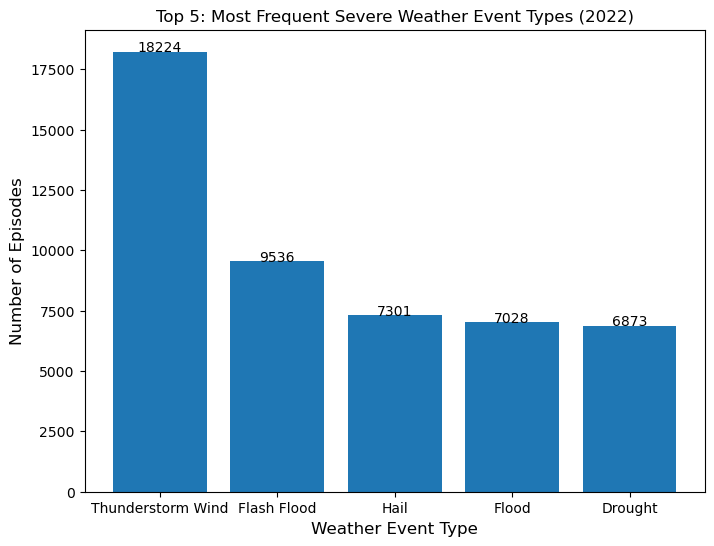

In [563]:
# define a function to include data labels
def add_data_labels(x,y):
    for i, val in enumerate(x):
        plt.text(i, y[i], y[i], ha = 'center')  

# Graph presets
plt.figure(figsize = (8, 6)) # set plot width and height

# Graph data
plt.bar(most_frequent_events_2022.index.str.title(),
        most_frequent_events_2022.values)

# Graph settings
plt.xlabel("Weather Event Type", fontsize = 12) # set x-axis label
plt.ylabel("Number of Episodes", fontsize = 12) # set y-axis label

add_data_labels(most_frequent_events_2022.index, # add the data labels
                most_frequent_events_2022)

plt.xticks(fontsize = 10) # set x-tick size
plt.yticks(fontsize = 10) # set y-tick size

plt.title("Top 5: Most Frequent Severe Weather Event Types (2022)", fontsize = 12) # set graph title

# Display graph
plt.show()

#### Number of Severe Weather Events by State (2022)

In [456]:
# Count the number of severe weather events by 'state_fips_code'
storm_count_by_state_code_df = pd.DataFrame(storms_2022_df.groupby("state_fips_code")["episode_id"].count())
storm_count_by_state_code_df.reset_index(inplace = True)

# Rename the 'episode_id' column
storm_count_by_state_code_df.rename(columns={"episode_id": "num_severe_weather_events"}, inplace = True)
storm_count_by_state_code_df

,state_fips_code,num_severe_weather_events
0,1,1443
1,2,410
2,4,1561
3,5,2061
4,6,3358
...,...,...
61,95,93
62,96,9
63,97,38
64,98,36


In [457]:
# Create a dictionary to convert 'state_fips_codes' to their respective abbreviation
# in order to create a Plotly Choropleth map
fips_state_abbrv_dict = {
      2: "AK"
    , 1: "AL"
    , 5: "AR"
    , 60: "AS"
    , 4: "AZ"
    , 6: "CA"
    , 8: "CO"
    , 9: "CT"
    , 11: "DC"
    , 10: "DE"
    , 12: "FL"
    , 13: "GA"
    , 66: "GU"
    , 15: "HI"
    , 19: "IA"
    , 16: "ID"
    , 17: "IL"
    , 18: "IN"
    , 20: "KS"
    , 21: "KY"
    , 22: "LA"
    , 25: "MA"
    , 24: "MD"
    , 23: "ME"
    , 26: "MI"
    , 27: "MN"
    , 29: "MO"
    , 28: "MS"
    , 30: "MT"
    , 37: "NC"
    , 38: "ND"
    , 31: "NE"
    , 33: "NH"
    , 34: "NJ"
    , 35: "NM"
    , 32: "NV"
    , 36: "NY"
    , 39: "OH"
    , 40: "OK"
    , 41: "OR"
    , 42: "PA"
    , 72: "PR"
    , 44: "RI"
    , 45: "SC"
    , 46: "SD"
    , 47: "TN"
    , 48: "TX"
    , 49: "UT"
    , 51: "VA"
    , 78: "VI"
    , 50: "VT"
    , 53: "WA"
    , 55: "WI"
    , 54: "WV"
    , 56: "WY"
    }

In [458]:
# Create a new 'state' field based on the 'state_fips_code'
storm_count_by_state_code_df["state"] = storm_count_by_state_code_df["state_fips_code"].map(fips_state_abbrv_dict)

# Filter out those records for which there is no corresponding abbreviation
storm_count_by_state_code_df = storm_count_by_state_code_df[~storm_count_by_state_code_df["state"].isna()]
storm_count_by_state_code_df

,state_fips_code,num_severe_weather_events,state
0,1,1443,AL
1,2,410,AK
2,4,1561,AZ
3,5,2061,AR
4,6,3358,CA
5,8,1905,CO
6,9,233,CT
7,10,103,DE
8,11,121,DC
9,12,1710,FL


In [574]:
import plotly.express as px

# Graph data
fig = px.choropleth(storm_count_by_state_code_df
                    , locations = "state"
                    , locationmode = "USA-states"
                    , scope = "usa"
                    , color = "num_severe_weather_events"
                    , labels = {"num_severe_weather_events": "Number of Severe Weather Events"}
                    , color_continuous_scale = "Viridis")

# Graph settings
fig.update_layout(
                  title_text = 'Number of Severe Weather Events by State (2022)',
                  title_font_size = 22,
                  title_font_color="black", 
                  title_x=0.45, 
                 )


fig.show()

## Dataset Name:  Homeowners and Renters Insurance by State
---
<a id = "hris"></a>
[Back to Top](#btt)

TODO: Add description

### Loading in the Data

In [460]:
insurance_data = f"{insurance_file_path}\insurance_by_year_and_state.csv"
df_insurance = pd.read_csv(insurance_data)

In [461]:
df_insurance.head()

,year,state,homeowners_avg_premium,homeowners_rank,renters_avg_premium,renters_rank
0,2007,Alabama,905.0,12,218.0,6
1,2007,Alaska,861.0,14,175.0,17
2,2007,Arizona,634.0,39,200.0,11
3,2007,Arkansas,762.0,22,201.0,10
4,2007,California (4),925.0,11,231.0,3


### Pre-Processing the Data
<a id = "hris_pp"></a>

In [462]:
[*df_insurance["state"].unique()]

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California   (4)',
 'Colorado',
 'Connecticut',
 'D.C.',
 'Delaware',
 'Florida   (5)',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New   Hampshire',
 'New   Jersey',
 'New   Mexico',
 'New York',
 'North   Carolina',
 'North   Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode   Island',
 'South   Carolina',
 'South   Dakota',
 'Tennessee',
 'Texas (6)',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West   Virginia',
 'Wisconsin',
 'Wyoming',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'North Carolina',
 'North Dakota',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'West Virginia',
 'California',
 'Florida',
 'Texas',
 'California (5)']

In [463]:
import re

def remove_number_parentheses(string):
    
    # Replace the footnote markers from the state name with an empty string
    return re.sub(r'\(\d\)', '', string)

In [464]:
df_insurance["state"] = [remove_number_parentheses(state) for state in df_insurance["state"]]

# Remove extra white spaces
df_insurance["state"] = [" ".join(state.split())for state in df_insurance["state"]]

sorted(df_insurance["state"].unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'D.C.',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [465]:
len(df_insurance["state"].unique())

51

### Exploratory Data Analysis
<a id = "hris_eda"></a>

## Dataset Name: State to State Migration Flows
---
<a id = "s2smf"></a>
[Back to Top](#btt)

"The American Community Survey (ACS) and the Puerto Rico Community Survey (PRCS) ask respondents age 1 year and over whether they lived in the same residence 1 year ago. For people who lived in a different residence, the location of their previous residence is collected. The state-to-state migration flows are created from tabulations of the current state (including the District of Columbia and Puerto Rico) of residence crossed by state of residence 1 year ago. Tables of ACS state-to-state flows are available going back to the 2005 ACS – the first year of full implementation of the survey." - _United States Census Bureau_

### Loading in the Pre-Processed Data
<a id = "s2smf_pp"></a>

The data can be directly loaded into a dataframe from each of the Excel files without the need for any pre-processing since that has been implemented within the `census_state_migration_cleaned_xls.py` file.

Within, the following pre-processing steps are applied to the raw data:

1. Extract the pertinent columns (excluding those which do not represent state to state migration figures
2. Delete all blank rows since the states are partitioned in groups of 5
3. Manipulate the original Excel files (which contain multi-index column headers: 1st level = State Name, 2nd level = Estimate and Margin of Error) such that the State Name is converted into a separate column
4. Filter out any rows where the 'Moved To' and 'Moved From' states are equal since we only want to capture interstate migration flows

In [466]:
# Load in the 2022 data into a dataframe
s2s_migration_2021 = f"{census_cleaned_files_folder}\state_to_state_migrations_dataframe_2021.xlsx"
df_s2s_migration_2021 = pd.read_excel(s2s_migration_2021)

In [467]:
df_s2s_migration_2021.head()

,Moved To: State,Moved From: State,Estimate,MOE
0,Alabama,Alaska,12,29
1,Alabama,Arizona,1338,1009
2,Alabama,Arkansas,1271,943
3,Alabama,California,3369,1420
4,Alabama,Colorado,2070,1081


In [468]:
df_s2s_migration_2021 = df_s2s_migration_2021.set_axis(["moved_to", "moved_from", "estimate", "margin_of_error"],\
                                                       axis = 1)

In [469]:
df_s2s_migration_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   moved_to         2756 non-null   object
 1   moved_from       2756 non-null   object
 2   estimate         2756 non-null   int64 
 3   margin_of_error  2756 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 86.3+ KB


In [470]:
df_s2s_migration_2021.isna().sum()

moved_to           0
moved_from         0
estimate           0
margin_of_error    0
dtype: int64

In [471]:
"""
Strip an leading and / or trailing whitespace from the 'moved_to' and 'moved_from' column
to ensure that state names can be converted to their respective abbreviations 
in order to create Plotly Choropleth map visuals
"""

columns = ["moved_to", "moved_from"]
df_s2s_migration_2021[columns] = df_s2s_migration_2021[columns].apply(lambda state: state.str.strip())

### Exploratory Data Analysis
<a id = "s2smf_eda"></a>

In [472]:
# Calculate the total number of individuals that have 'moved_to' and 'moved_from' a particular state
moved_to_totals = df_s2s_migration_2021.groupby('moved_to')['estimate'].sum().reset_index()
moved_from_totals = df_s2s_migration_2021.groupby('moved_from')['estimate'].sum().reset_index()

# Rename the columns
moved_to_totals = moved_to_totals.rename(columns = {"moved_to": "state", "estimate": "moved_to_total"})
moved_from_totals = moved_from_totals.rename(columns = {"moved_from": "state", "estimate": "moved_from_total"})

In [473]:
moved_to_totals.head()

,state,moved_to_total
0,Alabama,128262
1,Alaska,35250
2,Arizona,299250
3,Arkansas,81936
4,California,622102


In [474]:
moved_from_totals.head()

,state,moved_from_total
0,Alabama,104528
1,Alaska,42291
2,Arizona,176783
3,Arkansas,62338
4,California,841370


In [475]:
# Merge the 2 dataframes so that we may view migration patterns by state
net_migration_2021 = pd.merge(moved_to_totals, moved_from_totals, on = "state", how = "outer").fillna(0)

# Convert 'moved_to_total' back to type 'int'
net_migration_2021["moved_to_total"]= net_migration_2021["moved_to_total"].astype("int")

net_migration_2021.head()

,state,moved_to_total,moved_from_total
0,Alabama,128262,104528
1,Alaska,35250,42291
2,Arizona,299250,176783
3,Arkansas,81936,62338
4,California,622102,841370


In [476]:
net_migration_2021["net_migration"] = net_migration_2021["moved_to_total"] - net_migration_2021["moved_from_total"]

# Note that the last 2 rows of the dataframe reflect migration from: 'Foreign Country' and 'U.S. Island Area'
# These 2 rows will be dropped from the dataframe as we will focus on net migration within the continental U.S.
net_migration_2021

,state,moved_to_total,moved_from_total,net_migration
0,Alabama,128262,104528,23734
1,Alaska,35250,42291,-7041
2,Arizona,299250,176783,122467
3,Arkansas,81936,62338,19598
4,California,622102,841370,-219268
5,Colorado,276255,246177,30078
6,Connecticut,123633,97129,26504
7,Delaware,47315,36691,10624
8,District of Columbia,65253,62725,2528
9,Florida,812551,477792,334759


In [477]:
# Drop the last 2 rows from the dataframe
net_migration_2021.drop(net_migration_2021.tail(2).index,inplace=True)

In [478]:
net_migration_2021.tail()

,state,moved_to_total,moved_from_total,net_migration
47,Virginia,317028,277019,40009
48,Washington,273045,269344,3701
49,West Virginia,45994,36026,9968
50,Wisconsin,136770,113275,23495
51,Wyoming,29330,35311,-5981


In [479]:
# Create a dictionary to convert 'state_fips_codes' to their respective abbreviation
state_abbrv_dict = {
    "Alaska": "AK"
    , "Alabama": "AL"
    , "Arkansas": "AR"
    , "Arizona": "AZ"
    , "California": "CA"
    , 'Colorado': "CO"
    , "Connecticut": "CT"
    , "District of Columbia": "DC"
    , "Delaware": "DE"
    , "Florida": "FL"
    , "Georgia": "GA"
    , "Guam": "GU"
    , "Hawaii": "HI"
    , "Iowa": "IA"
    , "Idaho": "ID"
    , "Illinois": "IL"
    , "Indiana": "IN"
    , "Kansas": "KS"
    , "Kentucky": "KY"
    , "Louisiana": "LA"
    , "Massachusetts": "MA"
    , "Maryland": "MD"
    , "Maine": "ME"
    , "Michigan": "MI"
    , "Minnesota": "MN"
    , "Missouri": "MO"
    , "Mississippi": "MS"
    , "Montana": "MT"
    , "North Carolina": "NC"
    , "North Dakota": "ND"
    , "Nebraska": "NE"
    , "New Hampshire": "NH"
    , "New Jersey": "NJ"
    , "New Mexico": "NM"
    , "Nevada": "NV"
    , "New York": "NY"
    , "Ohio": "OH"
    , "Oklahoma": "OK"
    , "Oregon": "OR"
    , "Pennsylvania": "PA"
    , "Puerto Rico": "PR"
    , "Rhode Island": "RI"
    , "South Carolina": "SC"
    , "South Dakota": "SD"
    , "Tennessee": "TN"
    , "Texas": "TX"
    , "Utah": "UT"
    , "Virginia": "VA"
    , "Virgin Islands": "VI"
    , "Vermont": "VT"
    , "Washington": "WA"
    , "Wisconsin": "WI"
    , "West Virginia": "WV"
    , "Wyoming": "WY"
    }

In [480]:
# Create a new 'state' field based on the 'state_fips_code'
net_migration_2021["state"] = net_migration_2021["state"].map(state_abbrv_dict)
net_migration_2021

,state,moved_to_total,moved_from_total,net_migration
0,AL,128262,104528,23734
1,AK,35250,42291,-7041
2,AZ,299250,176783,122467
3,AR,81936,62338,19598
4,CA,622102,841370,-219268
5,CO,276255,246177,30078
6,CT,123633,97129,26504
7,DE,47315,36691,10624
8,DC,65253,62725,2528
9,FL,812551,477792,334759


In [575]:
# Graph data
fig = px.choropleth(net_migration_2021
                    , locations = "state"
                    , locationmode = "USA-states"
                    , scope = "usa"
                    , color = "net_migration"
                    , labels = {"net_migration": "Net Migration"} 
                    , color_continuous_scale = "Viridis")

# Graph settings
fig.update_layout(
                  title_text = "Net Migration By State (2021)",
                  title_font_size = 22,
                  title_font_color="black", 
                  title_x=0.45, 
                 )

fig.show()

In [511]:
fl_migration_2021_df = df_s2s_migration_2021[(df_s2s_migration_2021["moved_to"] == "Florida")
                                             & (df_s2s_migration_2021["moved_from"] != "Foreign Country")]

fl_migration_2021_df.head()

,moved_to,moved_from,estimate,margin_of_error
477,Florida,Alabama,15159,4087
478,Florida,Alaska,2938,2747
479,Florida,Arizona,6607,1882
480,Florida,Arkansas,4804,2217
481,Florida,California,37464,6348


In [586]:
import plotly.graph_objects as go

fig = go.Figure(go.Parcats(
                            dimensions=[
                                {'label': 'Moved From', 'values': fl_migration_2021_df['moved_from']},
                                {'label': 'Moved To', 'values': fl_migration_2021_df['moved_to']},
                            ],
                            counts=fl_migration_2021_df['estimate']
                           ))

fig.update_layout(title_text="Interstate Migration to FL (2021)",
                height = 1200,
                width=1050,
                font_size=18)



fig.show()

In [513]:
tx_migration_2021_df = df_s2s_migration_2021[(df_s2s_migration_2021["moved_to"] == "Texas")
                                            & (df_s2s_migration_2021["moved_from"] != "Foreign Country")]

tx_migration_2021_df.head()

,moved_to,moved_from,estimate,margin_of_error
2279,Texas,Alabama,9389,3488
2280,Texas,Alaska,2587,1787
2281,Texas,Arizona,17609,3581
2282,Texas,Arkansas,13613,3625
2283,Texas,California,107546,9974


In [587]:
fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'Moved From', 'values': tx_migration_2021_df['moved_from']},
        {'label': 'Moved To', 'values': tx_migration_2021_df['moved_to']},
    ],
    counts=tx_migration_2021_df['estimate'],
))

fig.update_layout(title_text="Interstate Migration to TX (2021)",
                height = 1200,
                width=1050,
                font_size=18)

fig.show()